Come vi avevo accennato, mi interessa capire la robustezza rispetto:
- al livello di rumore
- alla dimensione del campione da far ascoltare per ottenere un risultato.

In entrambi i casi, mi aspetto dei grafici che fanno vedere, al variare di una variabile (livello di rumore, lunghezza del campione) il risultato del riconoscimento (può essere una variabile Corretto / sbagliato). Gli esperimento vanno fatti considerando più brani e ripetuti più volte per ciascun brano.

In [3]:
import pickle
import numpy as np
import scipy.io.wavfile as wav
import functions as f
import os
import matplotlib.pyplot as plt
import pandas as pd
from pydub import AudioSegment
from cycler import cycler
import librosa

plt.rcParams['figure.dpi'] = 140
plt.rcParams['axes.prop_cycle'] = cycler(color = ['#7180AC', '#6A605C', 'b', 'y'])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'black'

In [4]:
database = pickle.load(open('database_test.pickle', 'rb'))
song_name_index = pickle.load(open("song_test_index.pickle", "rb"))

# White Noise

### Goosebumps - White Noise

In [5]:
f.create_white_noise_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'white_noise/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/goosebumps/', database, song_name_index)

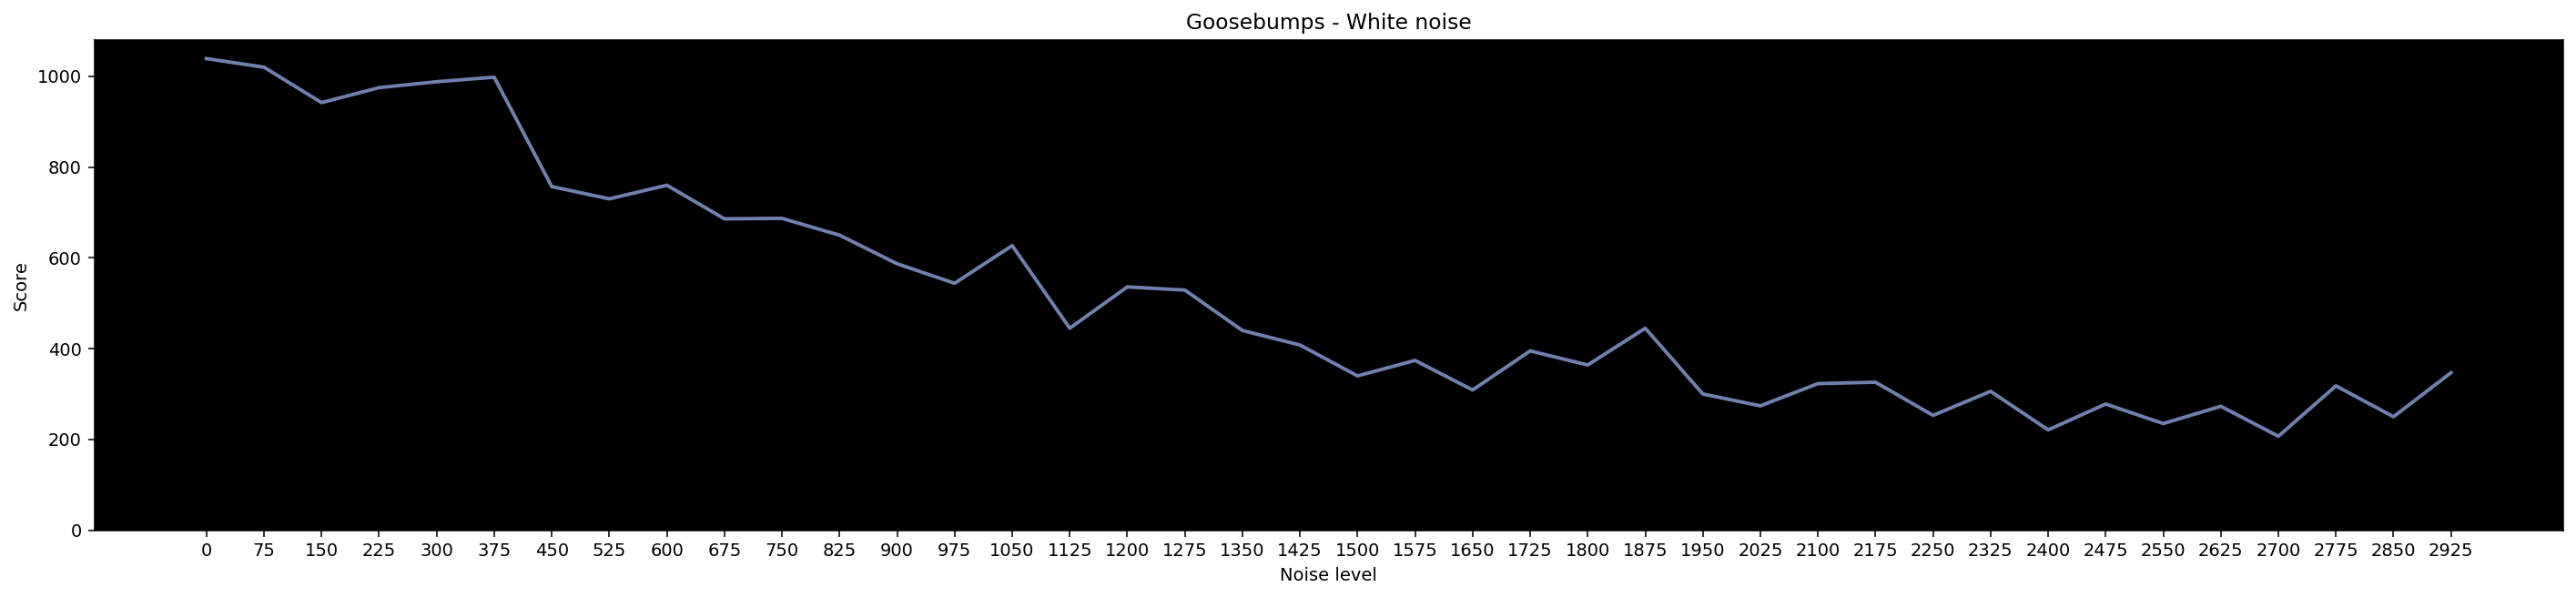

In [6]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - White noise')
plt.plot(os.listdir('white_noise/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/goosebumps/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [7]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,white_noise_0.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
1,white_noise_75.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
2,white_noise_150.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
3,white_noise_225.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
4,white_noise_300.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
5,white_noise_375.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
6,white_noise_450.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
7,white_noise_525.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
8,white_noise_600.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
9,white_noise_675.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."


### Save Your Tears - White Noise

In [8]:
f.create_white_noise_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'white_noise/tears')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/tears/', database, song_name_index)

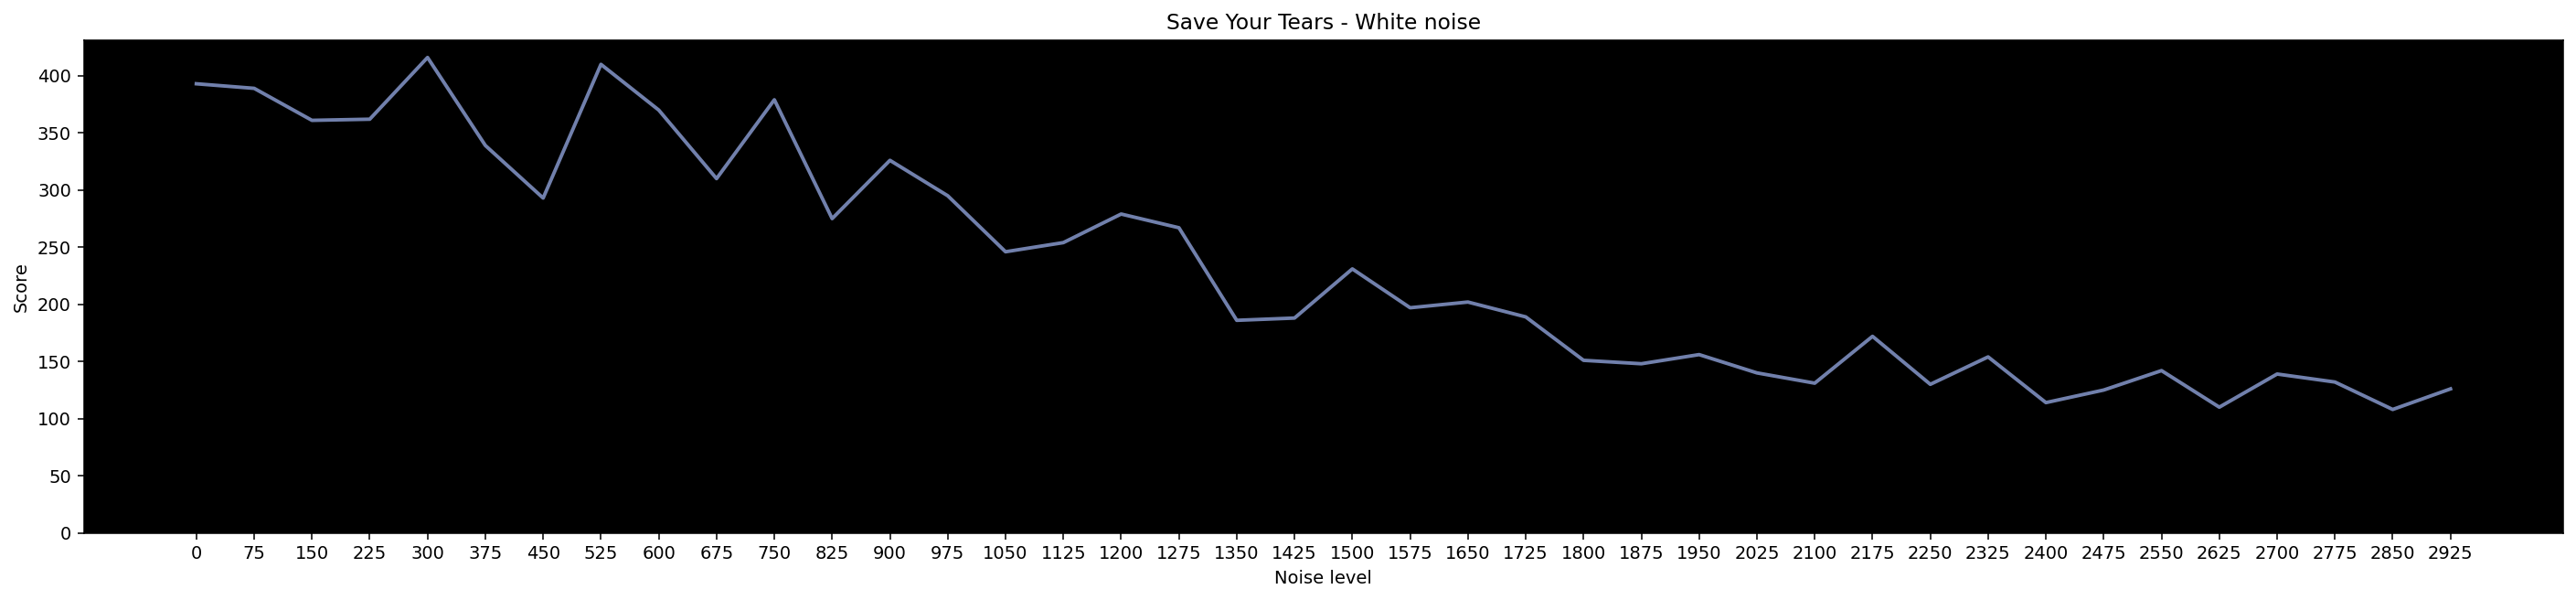

In [9]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - White noise')
plt.plot(os.listdir('white_noise/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/tears/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [10]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,white_noise_0.wav,converted/The Weeknd - Save Your Tears (Offici...
1,white_noise_75.wav,converted/The Weeknd - Save Your Tears (Offici...
2,white_noise_150.wav,converted/The Weeknd - Save Your Tears (Offici...
3,white_noise_225.wav,converted/The Weeknd - Save Your Tears (Offici...
4,white_noise_300.wav,converted/The Weeknd - Save Your Tears (Offici...
5,white_noise_375.wav,converted/The Weeknd - Save Your Tears (Offici...
6,white_noise_450.wav,converted/The Weeknd - Save Your Tears (Offici...
7,white_noise_525.wav,converted/The Weeknd - Save Your Tears (Offici...
8,white_noise_600.wav,converted/The Weeknd - Save Your Tears (Offici...
9,white_noise_675.wav,converted/The Weeknd - Save Your Tears (Offici...


At noise level equal to 1700, the algorithm started detecting the wrong song indicating that even white noise at high levels can be a problem

### POPSTAR - White Noise

In [11]:
f.create_white_noise_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'white_noise/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/popstar/', database, song_name_index)

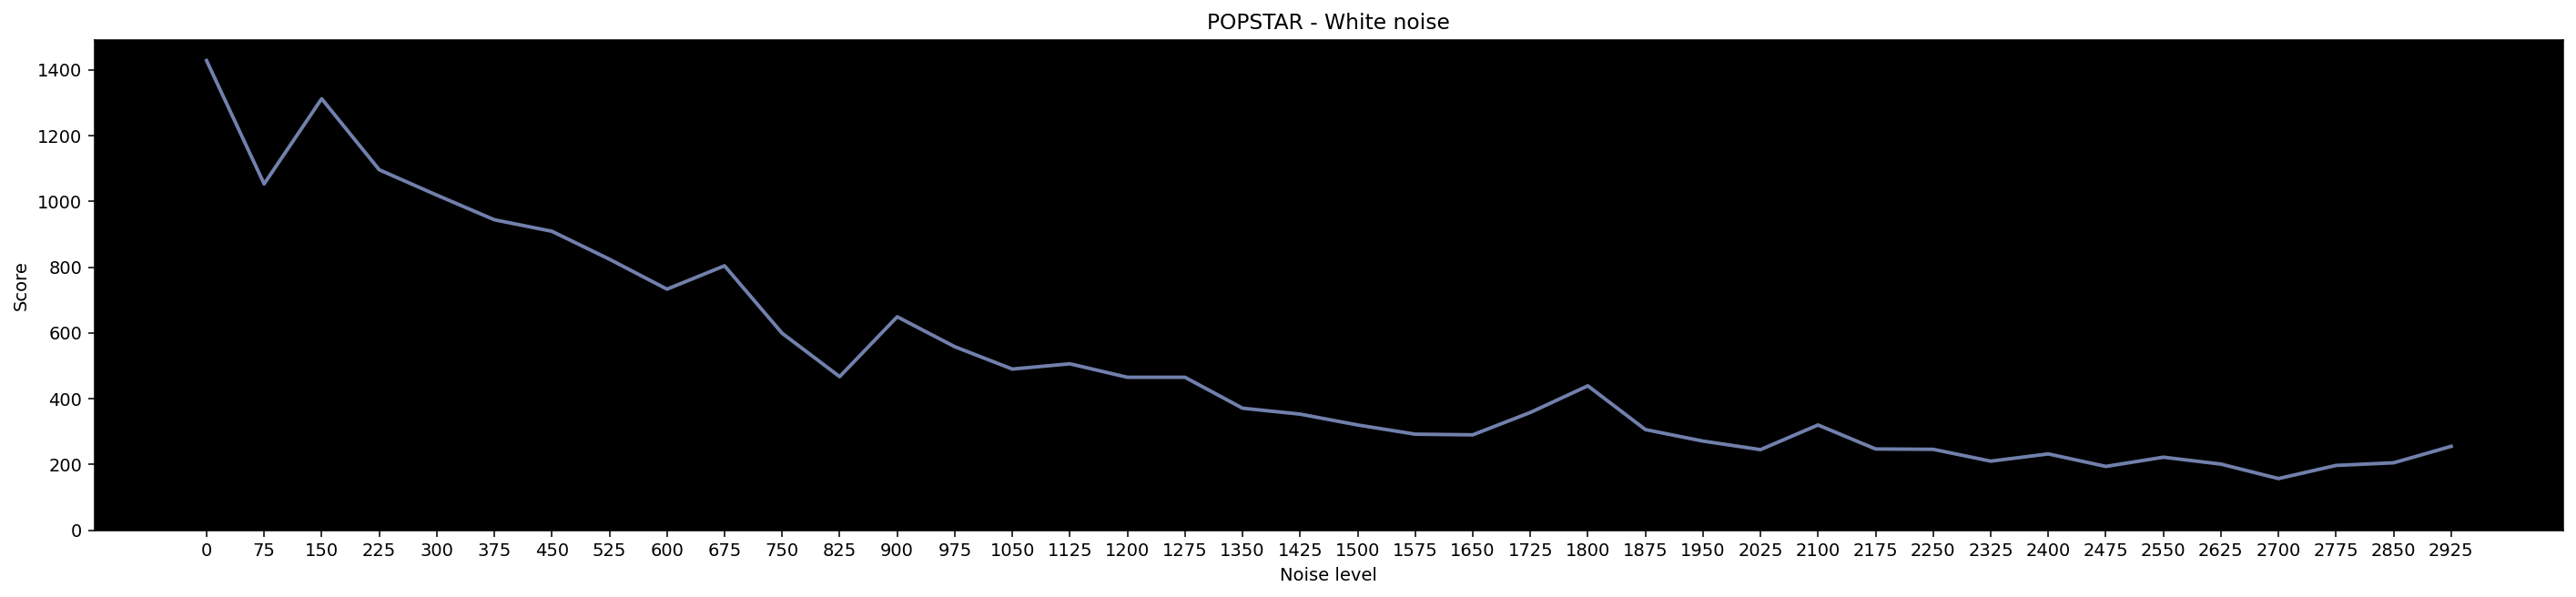

In [12]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - White noise')
plt.plot(os.listdir('white_noise/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/popstar/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [13]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,white_noise_0.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
1,white_noise_75.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
2,white_noise_150.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
3,white_noise_225.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
4,white_noise_300.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
5,white_noise_375.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
6,white_noise_450.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
7,white_noise_525.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
8,white_noise_600.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
9,white_noise_675.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...


# Clipping
Clipping is a form of distortion that occurs when an amplifier is overdriven and attempts to deliver an output voltage beyond its maximum capability.

### Goosebumps - Clipping

In [14]:
f.create_clipped_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'clipping/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('clipping/goosebumps/', database, song_name_index)
score = scores[::-1]

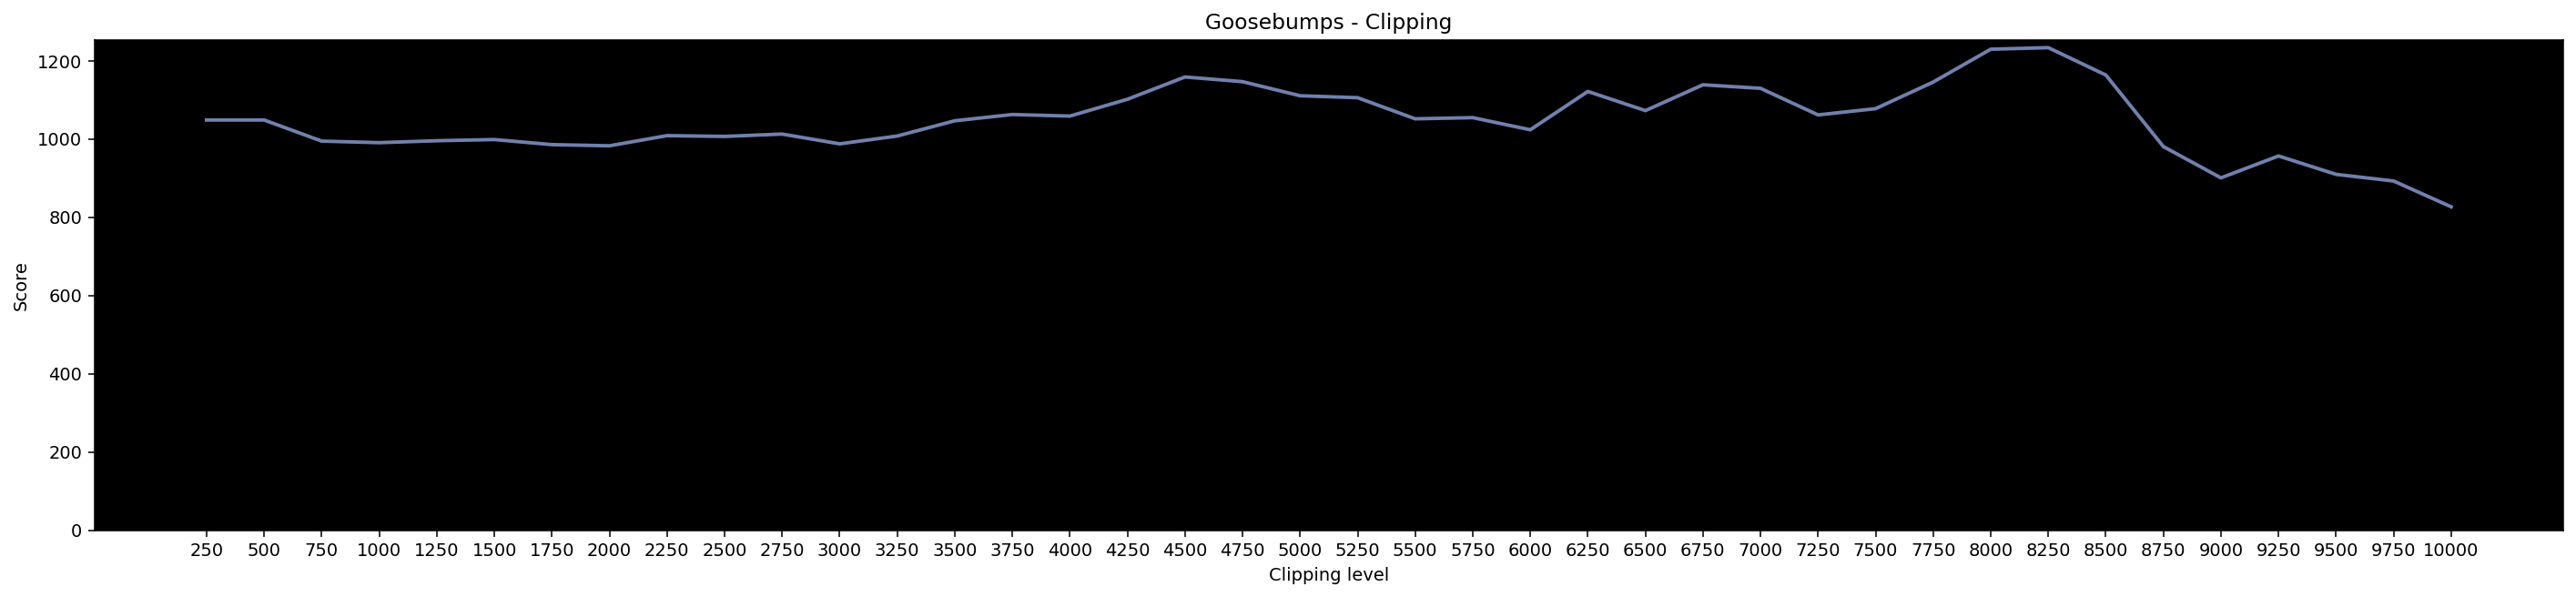

In [15]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Clipping')
plt.plot(os.listdir('clipping/goosebumps/'), score)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/goosebumps/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [16]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_250.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
1,clipping_500.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
2,clipping_750.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
3,clipping_1000.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
4,clipping_1250.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
5,clipping_1500.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
6,clipping_1750.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
7,clipping_2000.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
8,clipping_2250.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
9,clipping_2500.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."


### Save Your Tears - Clipping

In [17]:
f.create_clipped_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'clipping/tears')
list_of_right_songs, score = f.scores_for_different_noise('clipping/tears/', database, song_name_index)
scores = score[::-1]

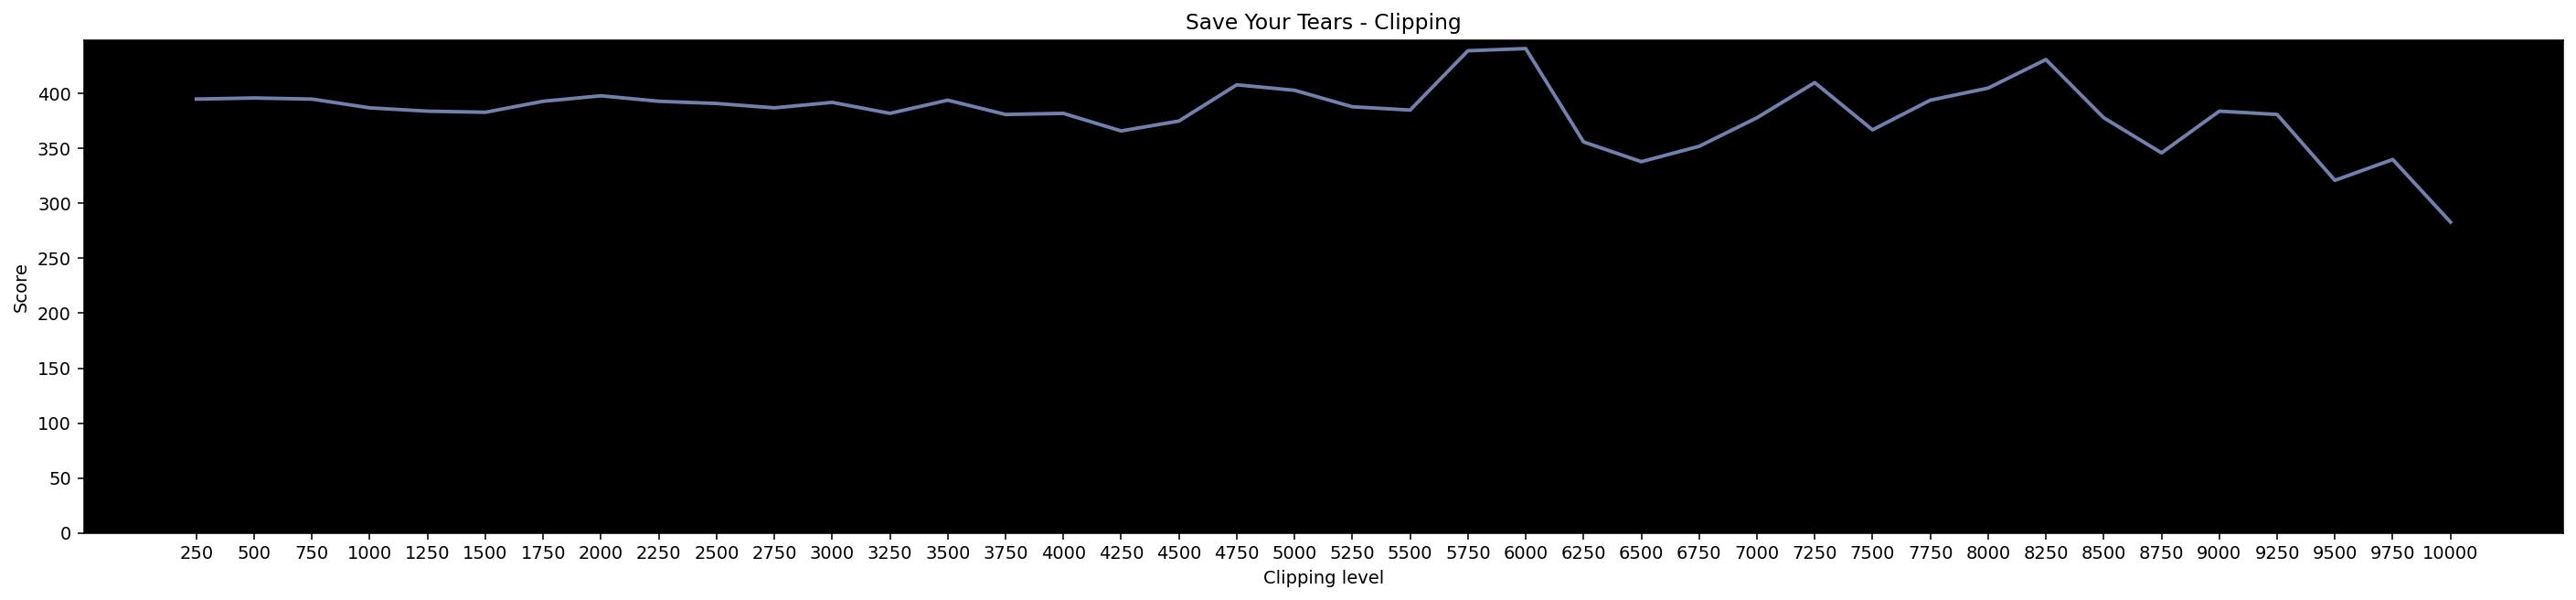

In [18]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Clipping')
plt.plot(os.listdir('clipping/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/tears/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [19]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_250.wav,converted/The Weeknd - Save Your Tears (Offici...
1,clipping_500.wav,converted/The Weeknd - Save Your Tears (Offici...
2,clipping_750.wav,converted/The Weeknd - Save Your Tears (Offici...
3,clipping_1000.wav,converted/The Weeknd - Save Your Tears (Offici...
4,clipping_1250.wav,converted/The Weeknd - Save Your Tears (Offici...
5,clipping_1500.wav,converted/The Weeknd - Save Your Tears (Offici...
6,clipping_1750.wav,converted/The Weeknd - Save Your Tears (Offici...
7,clipping_2000.wav,converted/The Weeknd - Save Your Tears (Offici...
8,clipping_2250.wav,converted/The Weeknd - Save Your Tears (Offici...
9,clipping_2500.wav,converted/The Weeknd - Save Your Tears (Offici...


### POPSTAR - Clipping

In [20]:
f.create_clipped_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'clipping/popstar')
list_of_right_songs, score = f.scores_for_different_noise('clipping/popstar/', database, song_name_index)
scores = score[::-1]

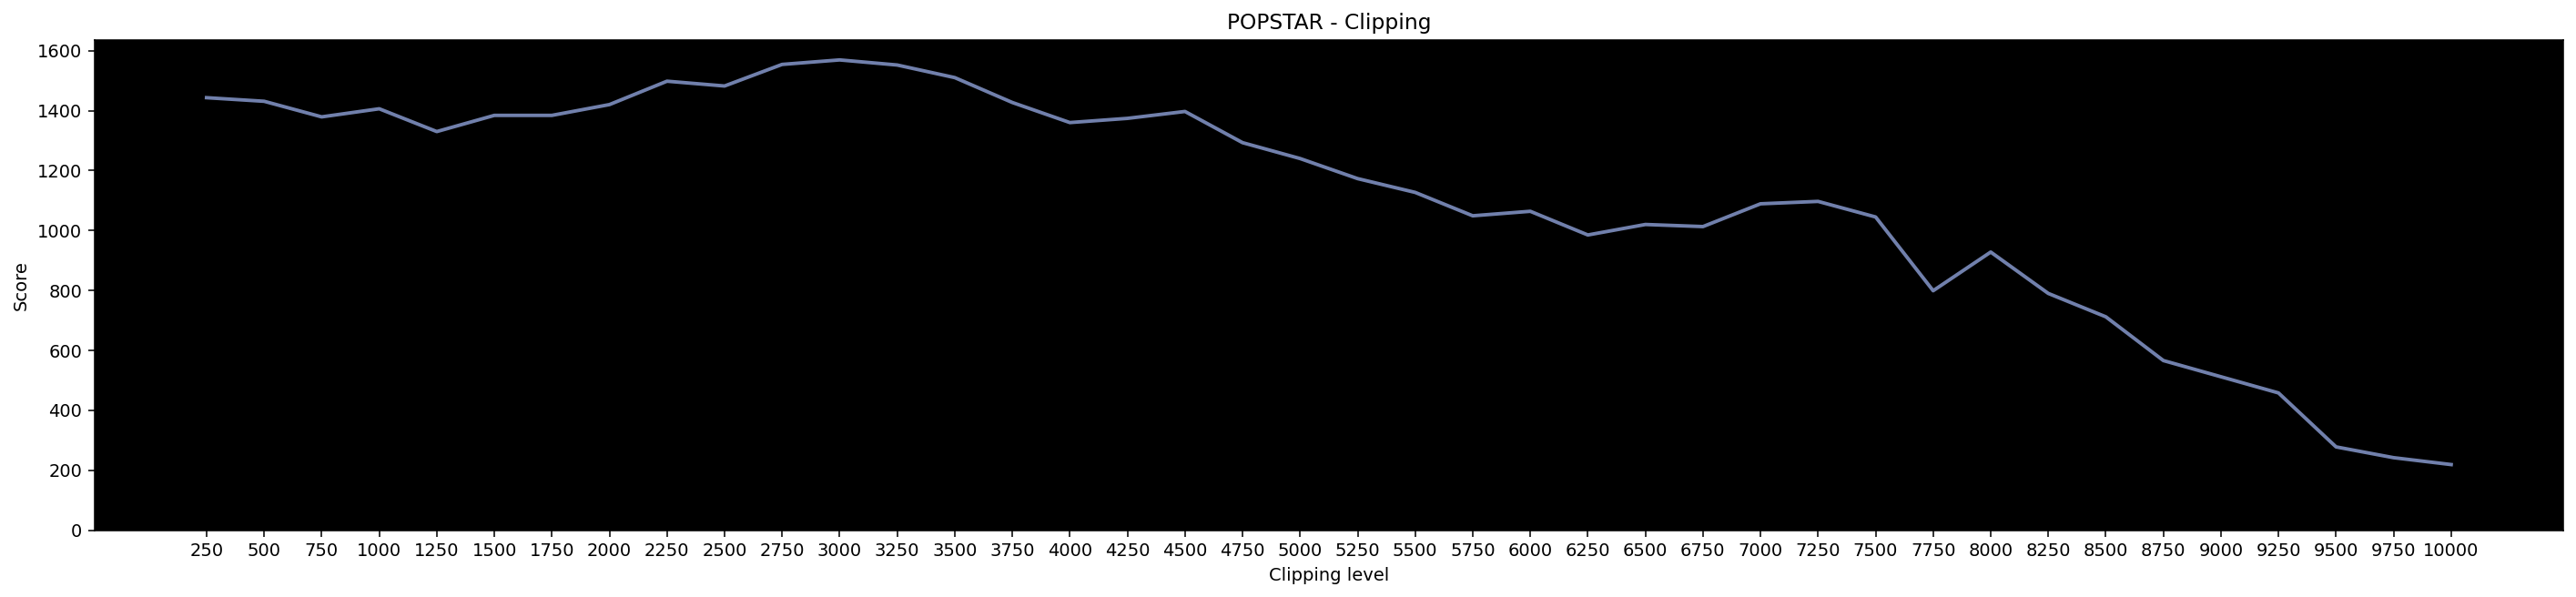

In [21]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Clipping')
plt.plot(os.listdir('clipping/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/popstar/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [22]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_250.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
1,clipping_500.wav,converted/Post Malone - Wow. (Official Music V...
2,clipping_750.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
3,clipping_1000.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
4,clipping_1250.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
5,clipping_1500.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
6,clipping_1750.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
7,clipping_2000.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
8,clipping_2250.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
9,clipping_2500.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...


# Pitch shifting

### Goosebumps - Pitch shifting

In [23]:
f.create_shifted_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'pitch/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/goosebumps/', database, song_name_index)

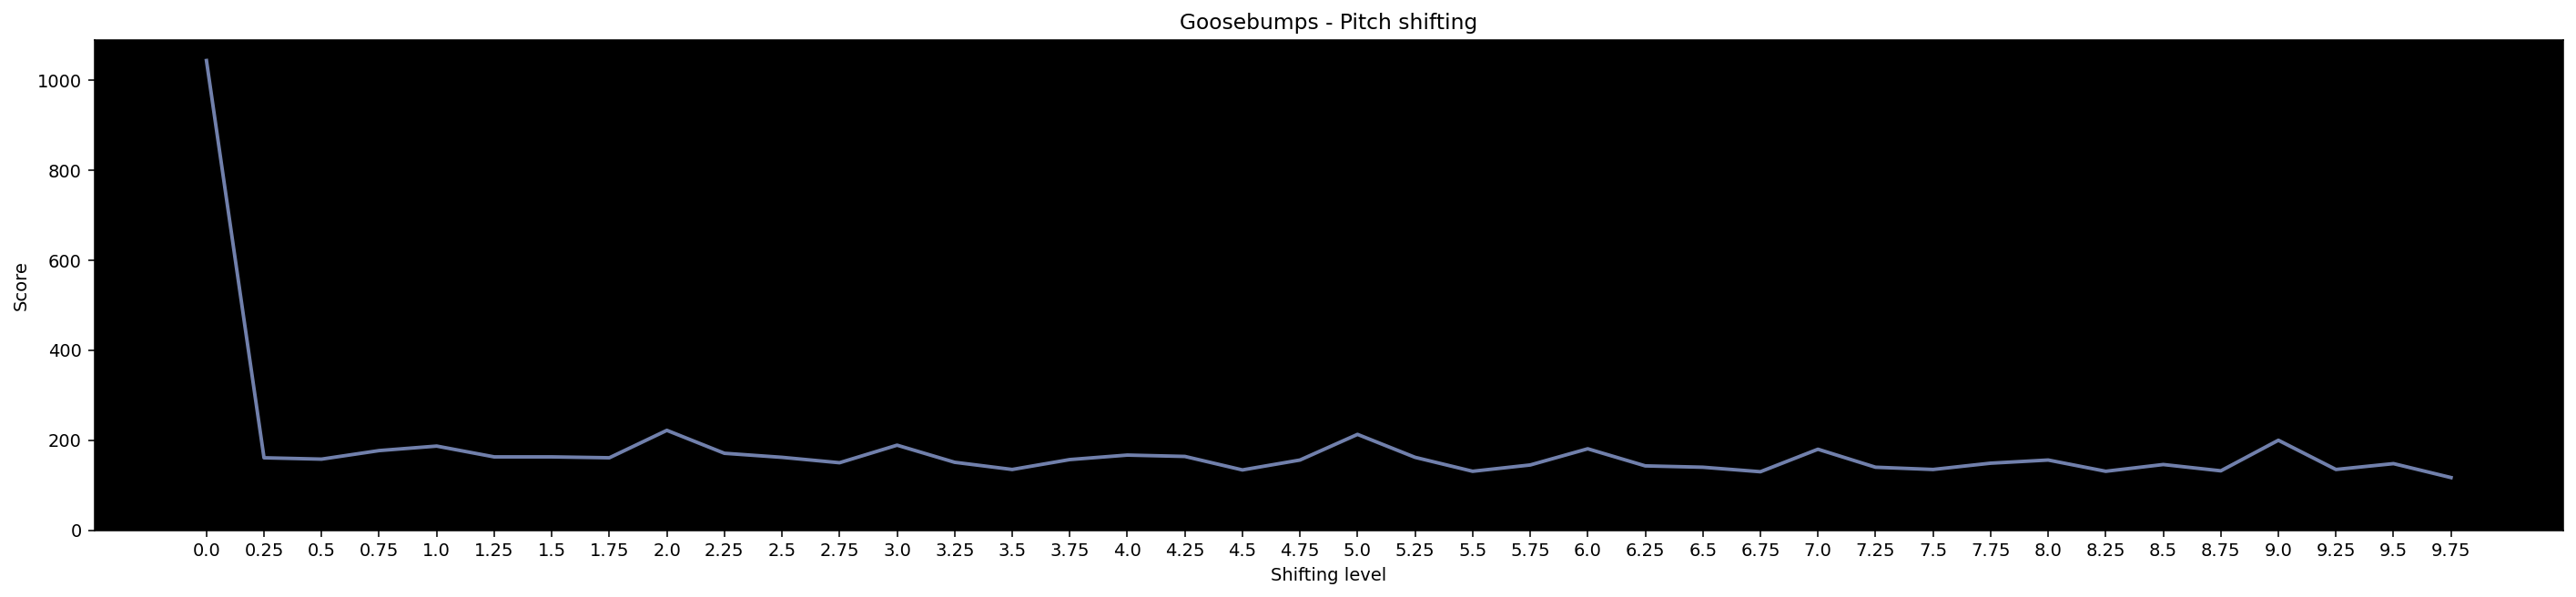

In [24]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Pitch shifting')
plt.plot(os.listdir('pitch/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/goosebumps/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [25]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_0.0.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
1,clipping_0.25.wav,converted/Miley Cyrus - Flowers (Official Vide...
2,clipping_0.5.wav,converted/BAD BUNNY x DRAKE - MÍA (Video Ofic...
3,clipping_0.75.wav,converted/Gotye - Somebody That I Used To Know...
4,clipping_1.0.wav,converted/BAD BUNNY - CALLAÍTA (Video Oficial...
5,clipping_1.25.wav,converted/Olivia Rodrigo - obsessed (Official ...
6,clipping_1.5.wav,converted/Olivia Rodrigo - obsessed (Official ...
7,clipping_1.75.wav,converted/Harry Styles - Treat People With Kin...
8,clipping_2.0.wav,converted/Miley Cyrus - Flowers (Official Vide...
9,clipping_2.25.wav,converted/Doja Cat - Paint The Town Red (Offic...


### Save Your Tears - Time stretching/Pitch shifting

In [26]:
f.create_shifted_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'pitch/tears')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/tears/', database, song_name_index)

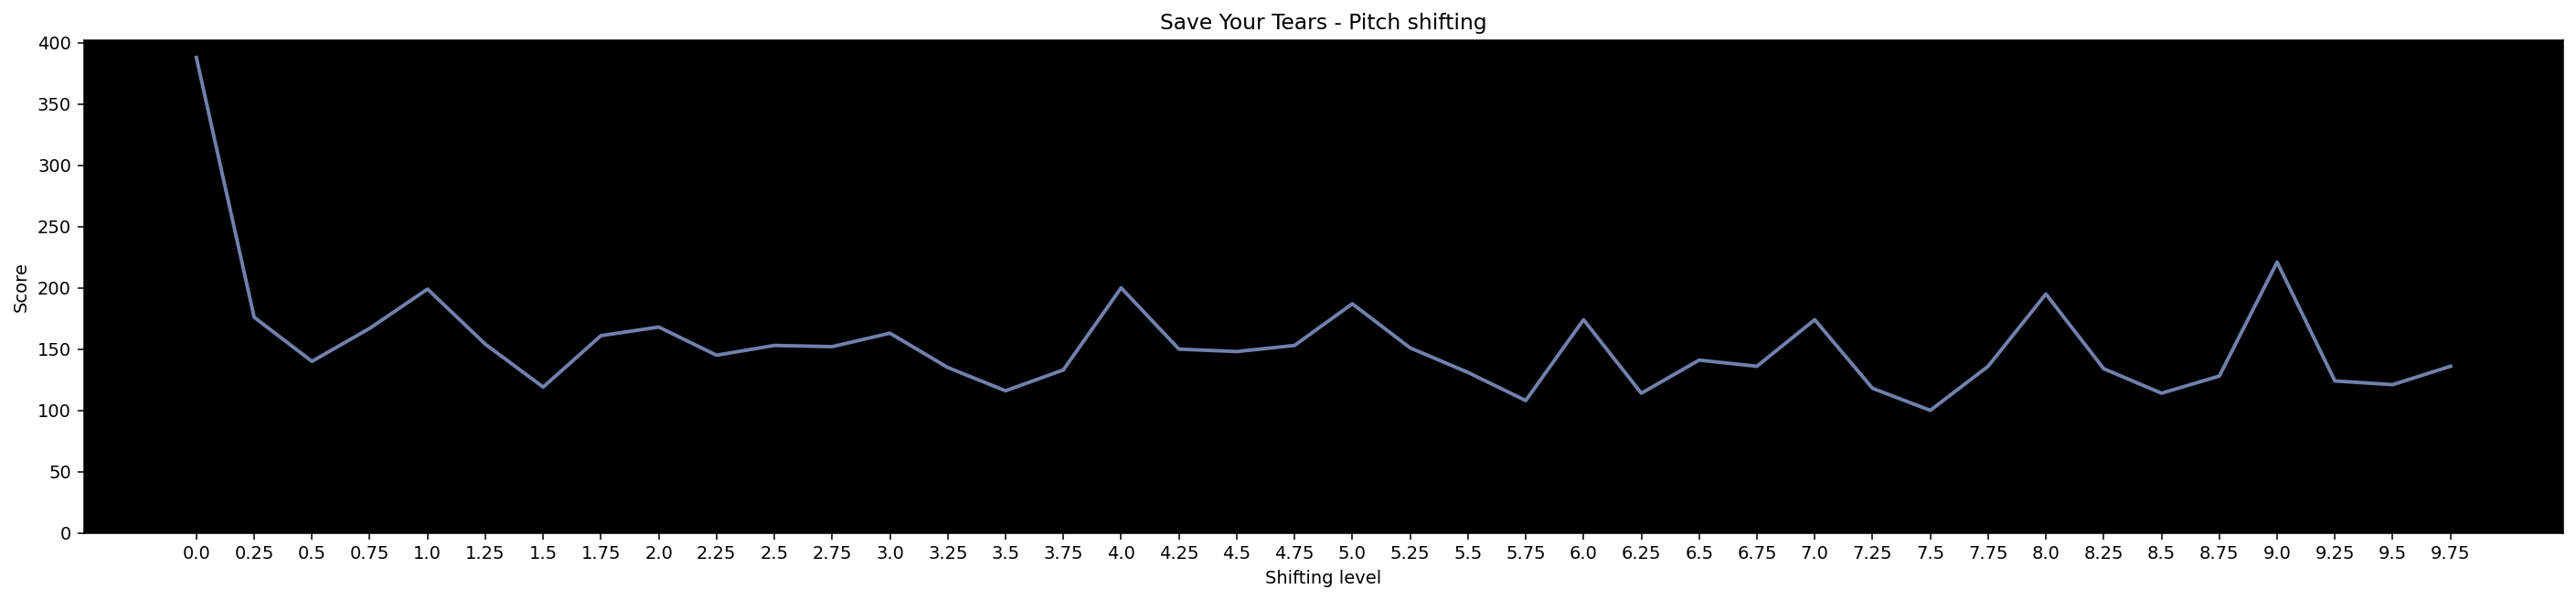

In [27]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Pitch shifting')
plt.plot(os.listdir('pitch/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/tears/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [28]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_0.0.wav,converted/The Weeknd - Save Your Tears (Offici...
1,clipping_0.25.wav,converted/Billie Eilish - What Was I Made For ...
2,clipping_0.5.wav,converted/Olivia Rodrigo - obsessed (Official ...
3,clipping_0.75.wav,converted/Artemas - i like the way you kiss me...
4,clipping_1.0.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
5,clipping_1.25.wav,converted/Lil Nas X - Old Town Road (Official ...
6,clipping_1.5.wav,converted/The Weeknd - Blinding Lights (Offici...
7,clipping_1.75.wav,converted/BAD BUNNY - CALLAÍTA (Video Oficial...
8,clipping_2.0.wav,converted/Justin Bieber - Anyone (Visualizer).wav
9,clipping_2.25.wav,converted/24kGoldn - Mood (Official Video) ft....


### POPSTAR - Time stretching/Pitch shifting

In [29]:
f.create_shifted_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'pitch/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/popstar/', database, song_name_index)

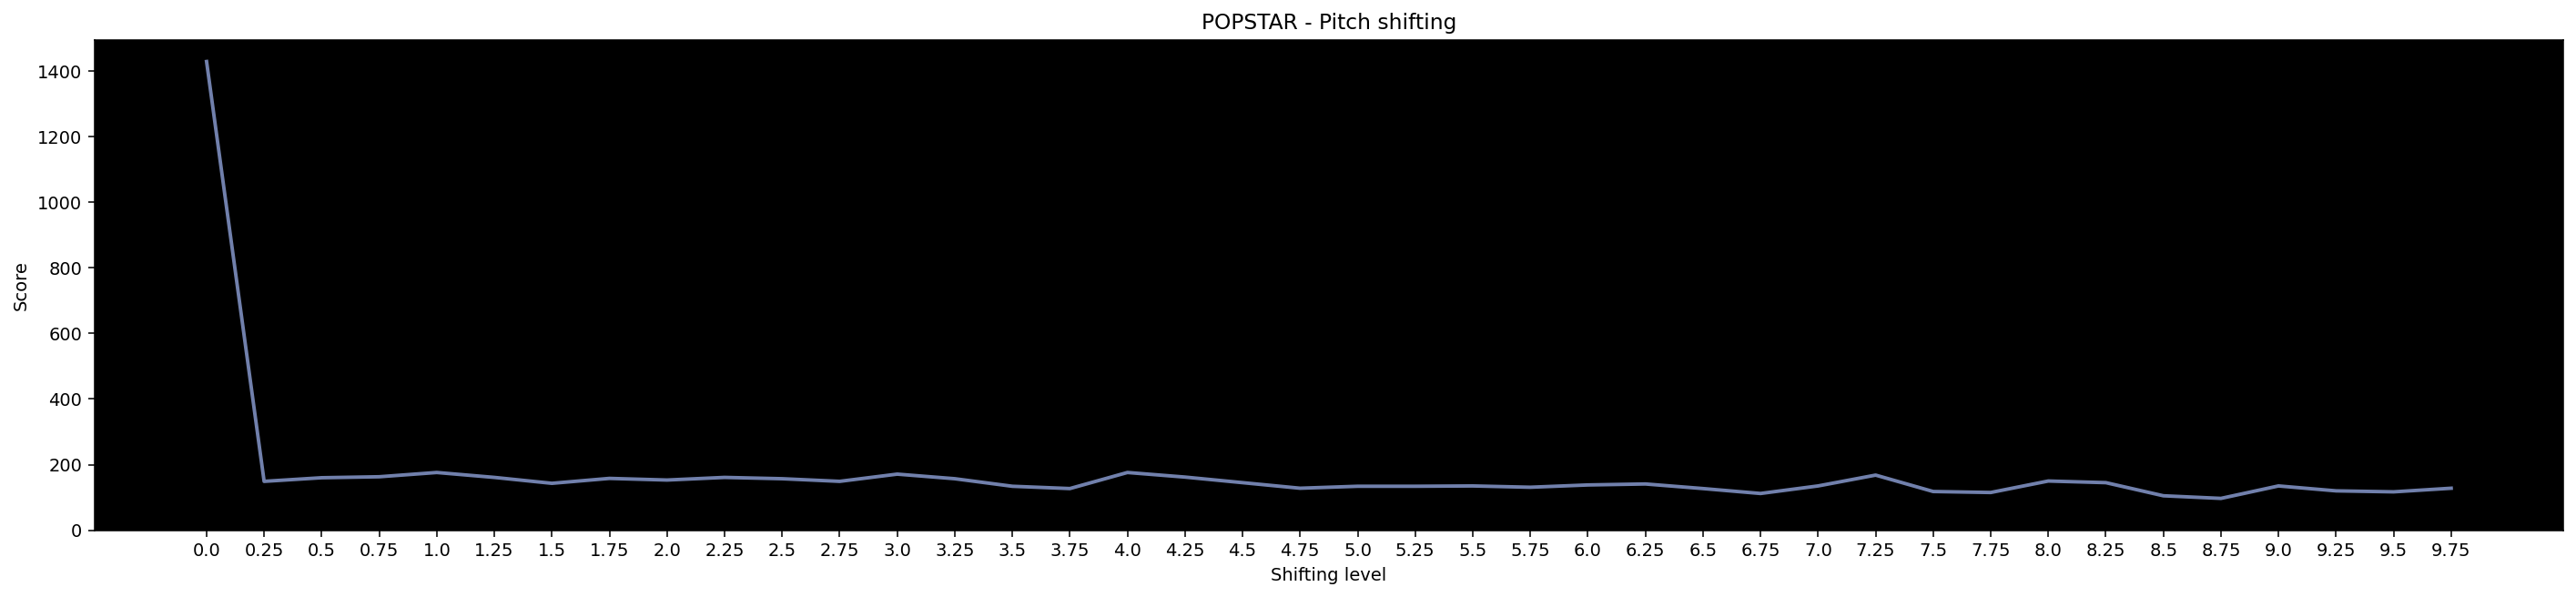

In [30]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Pitch shifting')
plt.plot(os.listdir('pitch/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/popstar/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [31]:
df = pd.DataFrame(list_of_right_songs.items())
df

,0,1
0,clipping_0.0.wav,converted/DJ Khaled ft. Drake - POPSTAR (Offic...
1,clipping_0.25.wav,converted/Olivia Rodrigo - obsessed (Official ...
2,clipping_0.5.wav,converted/The Weeknd - Blinding Lights (Offici...
3,clipping_0.75.wav,"converted/Travis Scott, HVME - Goosebumps (Rem..."
4,clipping_1.0.wav,converted/Artemas - i like the way you kiss me...
5,clipping_1.25.wav,converted/Dua Lipa - Houdini (Official Music V...
6,clipping_1.5.wav,converted/twenty one pilots Heathens (from Sui...
7,clipping_1.75.wav,converted/Gotye - Somebody That I Used To Know...
8,clipping_2.0.wav,converted/Justin Bieber - Anyone (Visualizer).wav
9,clipping_2.25.wav,converted/Harry Styles - Treat People With Kin...


# Shorter samples

In [32]:
f.shorten_file(20, 'converted_memo/original', 'converted_memo/20_sec')
f.shorten_file(10, 'converted_memo/original', 'converted_memo/10_sec')
f.shorten_file(5, 'converted_memo/original', 'converted_memo/5_sec')
f.shorten_file(3, 'converted_memo/original', 'converted_memo/3_sec')
f.shorten_file(1, 'converted_memo/original', 'converted_memo/1_sec')
f.shorten_file(0.5, 'converted_memo/original', 'converted_memo/0.5_sec')
list_of_scores = [f.scores_different_lenght('converted_memo/0.5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/1_sec', database, song_name_index), f.scores_different_lenght('converted_memo/3_sec', database, song_name_index), f.scores_different_lenght('converted_memo/5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/10_sec', database, song_name_index), f.scores_different_lenght('converted_memo/20_sec', database, song_name_index)]

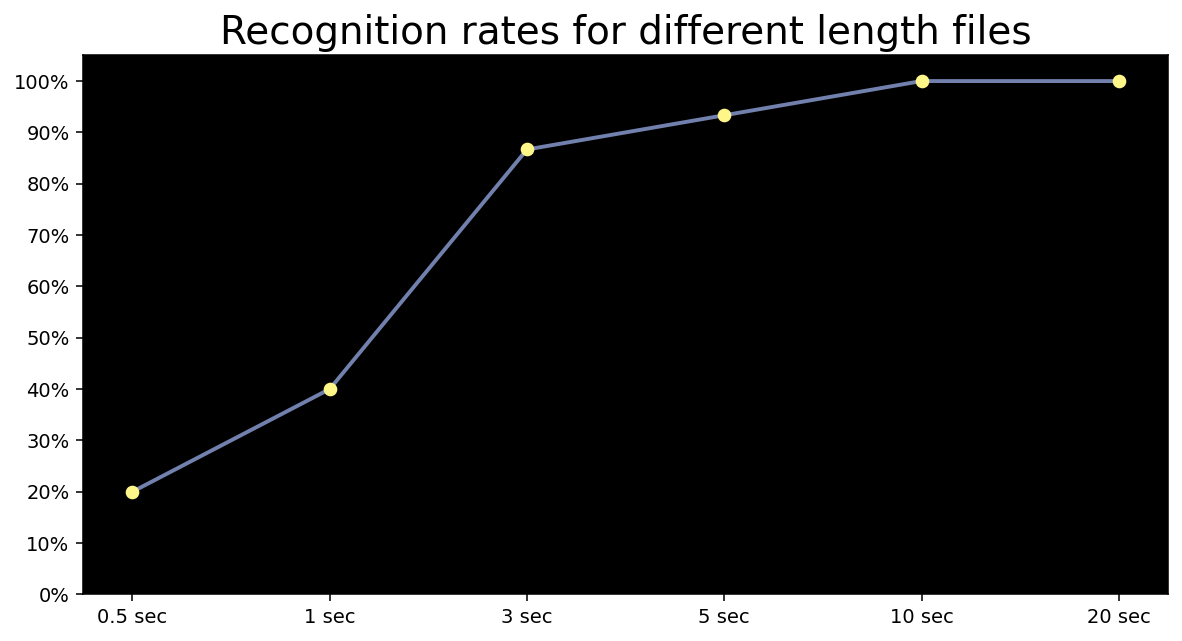

In [33]:
plt.figure(figsize = (10, 5))
plt.title('Recognition rates for different length files', fontsize = 20)
plt.plot(np.array(list_of_scores) / 15 * 100, zorder = 1)
plt.scatter([0, 1, 2, 3, 4, 5], np.array(list_of_scores) / 15 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = ['0.5 sec', '1 sec', '3 sec','5 sec', '10 sec', '20 sec'], ticks = [0, 1, 2, 3, 4, 5])
plt.show()

### remove files

In [34]:
f.remove_created_audio_files('white_noise')
f.remove_created_audio_files('pitch')
f.remove_created_audio_files('clipping')

----------------------
deleted files in directorywhite_noise/goosebumps
deleted files in directorywhite_noise/popstar
deleted files in directorywhite_noise/tears
----------------------
----------------------
deleted files in directorypitch/goosebumps
deleted files in directorypitch/popstar
deleted files in directorypitch/tears
----------------------
----------------------
deleted files in directoryclipping/goosebumps
deleted files in directoryclipping/popstar
deleted files in directoryclipping/tears
----------------------
